---

# 2020 8th CCF 大数据与计算智能大赛
## 题拍拍 - 小学数学应用题自动解题
## 决赛三等奖方案
## Delores（德洛丽丝）队

---

# 目录

- [00-摘要](#00-摘要)
- [01-爬虫小结](#01-爬虫小结)
    - [01-01-搜索](#01-01-搜索)
    - [01-02-爬取](#01-02-爬取)
    - [01-03-解析](#01-03-解析)
- [02-答案修正](#02-答案修正)
- [03-问题文本预处理](#03-问题文本预处理)
- [04-答案格式后处理](#04-答案格式后处理)
- [05-group_num预处理](#05-group_num预处理)
- [06-Graph2Tree方案](#06-Graph2Tree方案)
    - [06-01-模型详述](#06-01-模型详述)
    - [06-02-训练-预测](#06-02-训练-预测)
    - [06-03-生成单模答案](#06-03-生成单模答案)
- [07-Seq2Seq方案](#07-Seq2Seq方案)
    - [07-01-模型详述](#07-01-模型详述)
    - [07-02-训练-预测](#07-02-训练-预测)
    - [07-03-生成单模答案](#07-03-生成单模答案)
- [08-生成融合答案](#08-生成融合答案)
- [09-总结-将来工作](#09-总结-将来工作)
- [10-参考文献](#10-参考文献)


---

<span id = "00-摘要"></span>
# 00-摘要


我们Delores队采用了基于BERT的Seq2Seq，和Graph2Tree双方案，使用双方案均训练出基于不同配置、不同参数的若干个模型，以及基于这些模型得到的若干不同预测结果。在此基础上，我们将上述多个单模的预测结果进行投票融合（详见“[08-生成融合答案](#08-生成融合答案)”），得到最终提交。

对于每个问题的计算表达式，是我们双方案都需要依赖的重要训练因素，但是官方给出的训练集中并不包含计算表达式，所以采用“搜索-爬取-解析”的方式从网络资源中获取训练数据的表达式（详见“[01-爬虫小结](#01-爬虫小结)”）。但是由于该步我们设计的算法能力有限，以及网络资源有限，我们未必能够获得每道题的计算表达式，另外，我们得到的表达式也未必正确，在这样的前提下，我们须自行承担因为使用错误的计算表达式给模型进行训练而带来的损失（详见“[05-group_num预处理](#05-group_num预处理)”）。

问题文本的预处理，和答案格式的后处理，也是我们此次完成的重要工作；预处理的目的是为了方便模型的训练和预测，减少噪声（详见“[03-问题文本预处理](#03-问题文本预处理)”）；官方的评测方法中，答案格式也会考虑，即答案不仅要数值正确，且格式也要正确，所以我们制定了后处理规则（详见“[04-答案格式后处理](#04-答案格式后处理)”）。

在“[05-group_num预处理](#05-group_num预处理)”篇中，我们阐述了如何获取每个问题文本的num_list和group_num；对于训练集，我们又进一步阐述了我们做了怎样的文本数据增强（EDA），如何验证我们“搜索-爬取-解析”到的表达式是否正确。该步得到的经过预处理的每个问题文本、基于每个问题文本增强出来的问题文本、筛选验证后的表达式将会被我们所使用的两个方案：Seq2Seq和Graph2Tree共用。

对于Graph2Tree方案，我们首先对模型的原理进行详述（“[06-01-模型详述](#06-01-模型详述)”），然后在“[06-02-训练-预测](#06-02-训练-预测)”中陈述了用于训练的超参数和配置，Graph2Tree方案具体生成的9个单模预测记录于“[06-03-生成单模答案](#06-03-生成单模答案)”中，同时在笔者撰写该篇的时候，发现了之前代码中的一些“逻辑瑕疵”，亦详述于“[06-03-生成单模答案](#06-03-生成单模答案)”篇中。

对于Seq2Seq方案，模型原理部分见“[07-01-模型详述](#07-01-模型详述)”，我们在“[07-02-训练-预测](#07-02-训练-预测)”中陈述了用于训练的超参数和配置，Seq2Seq方案具体生成的8个单模预测记录于“[07-03-生成单模答案](#07-03-生成单模答案)”中。由于我们使用的服务器存储空间有限，我们丢失了该方案的模型文件，为此我们又使用同样的代码重新生成了8个单模和基于这些单模的预测，且该过程我们又执行了2遍，该情况详述于以上两篇中。

由于训练单个模型都会或多或少地出现欠拟合或是过拟合现象，从而影响模型的预测，于是我们制定了对两类模型（Seq2Seq、Graph2Tree）的结果的投票融合算法，并基于15个模型（Seq2Seq8个，Graph2Tree7个）得到了我们B榜最终的提交，详见“[08-生成融合答案](#08-生成融合答案)”。

整个比赛期间，我们Delores队恪守规则，辛勤耕耘，奋勇争先，硕果累累，但仍囿于比赛时间有限、硬件资源有限，以及我们的能力、经验有限，遗憾和不足在所难免，我们全篇的总结和未来拟提升的后续工作详见“[09-总结-将来工作](#09-总结-将来工作)”。

关键词：Graph2Tree，Seq2Seq，计算表达式，预/后处理，文本数据增强（EDA），投票融合算法

注：
我们参赛时使用的服务器配置：

GPU: NVIDIA Tesla V100 SXM2<br/>
显存：16G<br/>
CPU: Intel(R) Xeon(R) Platinum 8260 CPU @ 2.30GHz<br/>
内存：32G<br/>


注2：
双方案所使用到的开源工具包：

|爬虫|Graph2Tree|Seq2Seq|
|:----|:----|:----|
|python==3.6.9|python==3.6.9|python==3.5.6|
|itemadapter==0.2.0<br>Scrapy==2.4.0<br>tqdm==4.42.1|BaiduSpider==0.0.3<br>w3lib==1.22.0<br>hanlp==2.0.0a67<br>textda==0.1.0.6<br>numpy==1.18.5<br>requests==2.23.0<br>sympy==1.1.1<br>torch==1.7.0+cu101<br>tqdm==4.41.1<br>treelib==1.6.1|sympy==1.6.2<br>tqdm==4.54.1<br>Keras==2.2.4<br>bert4keras==0.9.6<br>pandas==0.25.3<br>numpy==1.16.1<br>tensorflow-gpu==1.13.1|


详见：

* Graph2Tree_submit/scrapy_competition/requirements.txt
* Graph2Tree_submit/competition/requirements.txt
* seq2seq_submit/CCF-MATHSOLVE/requirements.txt

注3: 本方案所有代码，亦可在 [CCF-BDCI-2020-MWP-](https://github.com/jackli777/CCF-BDCI-2020-MWP-) GitHub仓库中找到


---

<span id = "01-爬虫小结"></span>
# 01-爬虫小结

使用爬虫的目的，在于通过自动化手段，找到官方提供的训练集中每道题目的表达式，以供后续的模型训练使用。该步依赖程序自动提取和人工辅助提取表达式，对提取到的表达式不保证100%正确可用（有可能在训练使用中会出现错误的标注表达式，对于这种情况，由我们自身承担使用错误标注给模型训练的损失），其过滤和筛选算法详见本篇及“[05-group_num预处理](#05-group_num预处理)”。

给出的json文件中的equation和ans字段，均来自从网上爬取的数据，经过程序解析，或人工辅助解析。

爬虫共分三大步：1搜索 2爬取 3解析

---

<span id = "01-01-搜索"></span>
## 01-01-搜索

执行脚本：
- Graph2Tree_submit/competition/data_process_search_scraper_competition.py

数据输入文件：
- Graph2Tree_submit/official_data/train.csv

生成文件：
- Graph2Tree_submit/competition/generated/search_scraper_processed/train_searched_results.pkl
- Graph2Tree_submit/competition/generated/search_scraper_processed/search_scraper_memo_train.pkl

搜索使用的是百度引擎，搜索设置使用的是站内搜索，并且关键词位置仅限于网页标题中，网页上设置如下：

<!-- ![百度搜索设置](./pictures/baidu_setting.png) -->

<!-- 
<p align="center">
  <!-!- <img src="https://github.com/jackli777/CCF-BDCI-2020-MWP-/blob/master/pictures/baidu_setting.png?raw=true" /> -!->
  <img src="./pictures/baidu_setting.png" />
</p>
-->

<!-- ![百度搜索设置](https://github.com/jackli777/CCF-BDCI-2020-MWP-/blob/master/pictures/baidu_setting.png?raw=true) -->

![百度搜索设置][base64str]
[base64str]: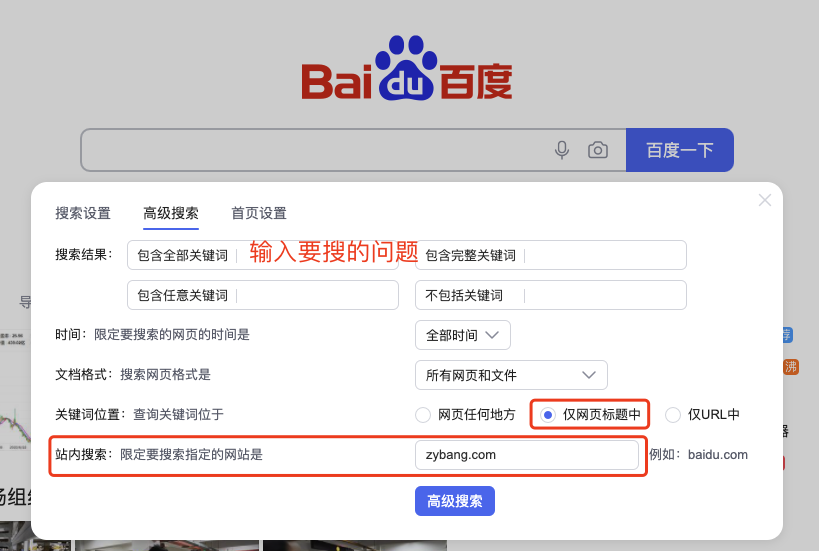



变成代码就是：

```
site:zybang.com "一种铁矿石每100千克含铁53.4千克，10吨这样的铁矿石含铁多少千克？"
```

该句直接输入到百度里，和上述设置效果一样。

此处我们使用实现百度搜索的开源工具BaiduSpider，实现百度搜索的功能。

候选站点：

能搜到结果的：

* search_site = 'zybang.com'
* search_site = 'mofangge.com'
* search_site = 'zhidao.baidu.com'

下面都不能直接搜到：

* search_site = 'tipaipai.com'
* search_site = 'xueersi.com'
* search_site = 'yuantiku.com'
* search_site = 'zhangmen.com'
* search_site = 'yuansouti.com'
* search_site = 'afanti100.com'
* search_site = 'yuanfudao.com'

对于上述能搜到结果的，作业帮（zybang.com）为首选，因为在其站点上搜索速度较快（1题/2s左右，具体根据使用时实际网络情况而定），且目标页面上的内容较有规律，后续爬取并解析数据较为方便；相比之下，魔方格（mofangge.com）目标页面的内容也比较有规律，但是在其站点上搜索速度过慢（1题/15s左右，具体根据使用时实际网络情况而定）；百度知道（zhidao.baidu.com）速度也还行，但是容易被百度反爬虫，另外其上面的内容格式较为随意，后续爬取及解析极为不便。

目前仅采用了作业帮的搜索结果。

按上述设置，对训练集中的12000题的每个问题进行搜索，该步由百度搜索算法返回n个结果，此处对每个问题取前10个结果保存（如果返回的结果超过10个，否则全部保存），也可能出现无返回结果），该步大致耗时12～15个小时（具体根据使用时实际网络情况而定）。

该步会生成一个pkl文件，内容是个列表（根层级大列表，12000个成员），其中每个成员（也是列表，就是对每个问题搜索返回的10个结果），字段如下：

```python
# train 的最后一个问题的搜索结果
[
    {
        'results_content': {
            # 由百度搜索返回的结果的描述（完全由百度提取并提供），后续爬取及解析时暂未使用
            'des': '修路队要修一条路,已经修了8天,平均每天修9米,还剩125米.这段路一共多少米?',
            # 就是对应的train中的问题索引（注意不是行号，而是csv的第一列，从0开始计）
            'doc_index': 11999,
            # 搜索站点的中文名，此处均为“作业帮”
            'origin': '作业帮',
            # 网页添加时间(有则提供，否则None)
            'time': None,
            # 由百度搜索返回的结果的标题（所谓标题匹配，就是用的这个和目标问题进行匹配，由百度完成匹配算法），后续爬取及解析时暂未使用
            # 不过百度搜索的硬性限制（谷歌搜索同样有限制）是32（现在查看变成38了）个字符（超过均截断），所以后续还要看页面上实际的问题是啥，进而计算LCS
            'title': '修路队要修一条路,已经修了8天,平均每天修9米,还剩125米...',
            # 就是预处理过的搜索问题（目标问题）
            'title_question': '修路队要修一条路，已经修了8天，平均每天修9米，还剩125米．这段路一共多少米？',
            # 搜索返回的类型，用处不大
            'type': 'result',
            # 搜索返回的url，此处是百度搜索返回的直接url，会被百度缓存，不知道是否有过期时间，后续过程中没有直接使用
            'url': 'http://www.baidu.com/link?url=xGThsbRWTMXsemk5_4utgSchBTrLX0Omgqba2rCdlgrjbOhfxURggjWnxo1Ei-YHoSh4Bp3CyAfIfohkUQAYme8IvGCRDO2eXXH3KsWXejq',
            # 由上述返回的url解析出的实际站点的真实url，后续过程中使用到的
            'url_real': 'http://www.zybang.com/error.html?status=404'
        },
        'site_name': 'zybang_com'
    },
    {
        'results_content': {
            'des': '最佳答案: 用方程,是吧. 设这段公路长X米 x -900=125×8 X -900=1000 '
            'X =1000+900 X =1900 路长1900米',
            'doc_index': 11999,
            'origin': '作业帮',
            'time': None,
            'title': '【修一段公路已经修了八天平均每天修125米还剩九百米没修...',
            'title_question': '修路队要修一条路，已经修了8天，平均每天修9米，还剩125米．这段路一共多少米？',
            'type': 'result',
            'url': 'http://www.baidu.com/link?url=XBDUWhARcEOSzP7ffkQo2QMd0Qk8cZchwZx7vUeEtAqPMbvVBKENw3PIMTdPlcs742J7LLqLqmRBZdyztcmZduu211GQkh36lFeFXesOBM7',
            'url_real': 'https://www.zybang.com/question/edd6a9064851511a5b752da5e56ce138.html'},
        'site_name': 'zybang_com'
    },
    # 此处仅列出前两个成员
]
```

统计如下：

|    |总数|可以搜到结果的|占比|
|:----|:----|:----|:----|
|train|12000|11804|98.37%|

注：上述得到的结果，可能每次搜索都不一样（网络环境的变化，百度规则的变化，搜索算法的变化，目标网站的变化等等），有条件的同学可以多次尝试。


---

<span id = "01-02-爬取"></span>
## 01-02-爬取

切换至目录：

* Graph2Tree_submit/scrapy_competition

执行命令：

* scrapy crawl zybang -o items_zybang_train_raw.json

数据输入文件：

* Graph2Tree_submit/competition/generated/search_scraper_processed/train_searched_results.pkl

生成文件：

* Graph2Tree_submit/competition/generated/scrapy_processed/items_zybang_train_raw.json


在拿到上述train的pkl后，将对每个成员的10个返回结果的每个url_real作为目标网站，访问之，并进行爬取。

需要爬取的内容主要有两个方面：

1. 该页面上的实际问题（会用来和目标文件比较计算LCS）

2. 解题过程（会用来提取表达式和答案）

作业帮的网站内容比较有规律：

<!-- ![作业帮网站示例](./pictures/zybang_example.png) -->

<p align="center">
  <img src="./pictures/zybang_example.png" />
</p>

红框内容，就是需要爬取的，包括问题文本和解题步骤；蓝框内容就是作业帮上面的分数表示，用的是html的table标签实现的；绿框内容表示该解答是“优质解答”（仅针对该页面上的该问题，由于该问题未必是LCS最优的问题，所以该解答也未必是最优解答，仅做参考），会成为下一步解析的时候对每个问题拿到的10个搜索结果排序时的第二参考因素（第一参考因素是LCS），对应的生成字段"is_best_ans": true。

<!-- ![作业帮优质解答](./pictures/zybang_best_ans.png) -->

<p align="center">
  <img src="./pictures/zybang_best_ans.png" />
</p>

如果该搜索结果返回的页面上没有“优质解答”（可能会出现“其他回答”或者“题目解析”等等），对应的生成字段"is_best_ans": false。

该步会生成一个大json文件，字段含义如下：

* question_searched：该页面上的问题文本（仍携带html标签，下一步会做提取和清理）
* fraction_nums_question：该页面上的问题文本中的分数（仍携带html标签，下一步会做提取和清理）
* calculation_procedures：该页面上的计算步骤（仍携带html标签，下一步会做提取和清理）
* fraction_nums_cal：该页面上的计算步骤中的分数（仍携带html标签，下一步会做提取和清理）
* is_best_ans：是否为“优质解答”

其他字段均从上一步（搜）拷贝过来，故同上。

统计如下：

|    |实际处理网页数（扣除“占位问题”）|理想状态（每个问题均有10个搜索结果）|比例|
|:----|:----|:----|:----|
|train|114036-196 = 113804|12000*10 = 120000|94.87%|

注：上述得到的结果，可能每次爬取都不一样（网络环境的变化，爬取站点上内容的变化），有条件的同学可以多次尝试。

---

<span id = "01-03-解析"></span>
## 01-03-解析

执行脚本：

* Graph2Tree_submit/competition/data_process_scrapy_results_zybang.py

数据输入文件：

* Graph2Tree_submit/competition/generated/scrapy_processed/items_zybang_train_raw.json

生成文件：

* Graph2Tree_submit/competition/generated/scrapy_processed/items_zybang_train_processed.json

解析的目的就是从上一步（爬取）的结果中，提取出表达式和答案。

在此之前，还要对每个问题拿到的10个搜索结果进行排序，排序的三大依据（按优先级排序）分别是：

1. 最长连续公共子串（就是上文多次提到的LCS），就是搜索到的问题文本和目标文本计算LCS，越长越好；
2. 对于在“作业帮”上搜到的结果，如果LCS相等，则考虑该搜索到的问题是否为“优质解答”，因为“优质解答”中的解题过程和答案质量较高，且更有规律，更容易提取；
3. 如果1、2都一样，则考虑哪个搜索到的问题文本最短，越短则特指性越强。

经过上述排序后，每个问题仅保留最优的一个搜索结果，作为提取的来源。

虽然作业帮上的“优质解答”很有规律，但也不免有些特例，答案方面只提取了解题过程中含有“答：”或者“故答案为：”文本行中的最后一个数字；表达式方面第一个识别为算式文本行的“=”前面的内容，所有方程类的解法均没有提取表达式（使用超过2个幂运算的也没有提取，否则后续eval的时候会出现过大的内存分配，导致电脑崩溃）。

以上过程，排序之前还要做替换问题文本中的分数；提取之前也要做替换解题步骤中的分数，以及二者都需要去除html标签等。提取过程中的运算符号统一、表述统一、识别方程、识别算式文本、去除干扰信息等过于繁琐，可详见上述执行脚本，此处不再赘述。

对于上面已经提取到的表达式和答案，后续再进行（部分）人工核对；有必要的，又进行了人工再提取。

对于上面无法通过显式的规则进行提取表达式和答案的，再进行人工提取，或者人工再搜索，或者人工计算求解表达式和答案，但是由于工作量太大，人工只完成了部分。

相比于上一步（爬），增加的字段含义如下：

* lcs：最长连续公共子串，作为比较的两段文本均去除标点（运算符类标点和百分号除外）
* lcs_len：上面的lcs的长度
* question_searched_cleaned_list：从字段question_searched提取并整理好的问题文本，之所以为list，是按html的<br>标签，以及分隔类标点进行的分割
* calculation_procedures_cleaned_list：从字段calculation_procedures提取并整理好的解题过程，之所以为list，是按html的<br>标签，以及分隔类标点进行的分割
* ans_crawled：爬取并提取的答案（部分由后续人工处理补充）
* equation_crawled：爬取并提取的表达式（部分由后续人工处理补充）

另外，为了便于排序，is_best_ans变成了1或者0；为了实现索引定位，url_real后面附加了GET参数?doc_index=某值，爬取请求的时候不会有额外影响。

下面是一个最终大json中的例子（train中的）：

```json
{
    "question_searched": [
        "<span class=\"qb-content\" data-gradeid=\"0\" data-courseid=\"2\">一列火车和一列慢车，同时分别从甲乙两地相对开出．快车每小时行75千米，慢车每小时行65千米，相遇时快车比慢车多行了40千米，甲乙两地相距多少千米？</span>"
    ],
    "fraction_nums_question": [],
    "calculation_procedures": [
        "<span>（75+65）×[40÷（75-65）]，<br>=140×[40÷10]，<br>=140×4，<br>=560（千米）；<br>答：甲乙两地相距560千米．</span>"
    ],
    "fraction_nums_cal": [],
    "is_best_ans": 1,
    "doc_index": 10,
    "des": "最佳答案: （75+65）×[40÷（75-65）]， =140×[40÷10]， =140×4， =560（千米）； 答：甲乙两地相距560千米．",
    "origin": "作业帮",
    "time": null,
    "title": "一列火车和一列慢车,同时分别从甲乙两地相对开出.快车每小...",
    "title_question": "一列火车和一列慢车，同时分别从甲乙两地相对开出．快车每小时行75千米，慢车每小时行65千米，相遇时快车比慢车多行了40千米，甲乙两地相距多少千米？",
    "type_": "result",
    "url": "http://www.baidu.com/link?url=Rq8cuFetFcUrt20RbzFJhB0XHuJ1cjIUU2bB992wnbxOBkbOEhjIGy0OB0x5jd4xqX86if4CVBeWqq5KGPsvd29-ci-2XTPwI41LFYqxy1O",
    "url_real": "https://www.zybang.com/question/288b3ef8d6192e65903fa5a6f5df4a48.html?doc_index=10",
    "question_searched_cleaned_list": [
        "一列火车和一列慢车，同时分别从甲乙两地相对开出．快车每小时行75千米，慢车每小时行65千米，相遇时快车比慢车多行了40千米，甲乙两地相距多少千米？"
    ],
    "lcs": "一列火车和一列慢车同时分别从甲乙两地相对开出快车每小时行75千米慢车每小时行65千米相遇时快车比慢车多行了40千米甲乙两地相距多少千米",
    "lcs_len": 67,
    "calculation_procedures_cleaned_list": [
        "（75+65）×[40÷（75-65）]",
        "=140×[40÷10]",
        "=140×4",
        "=560（千米）",
        "答：甲乙两地相距560千米"
    ],
    "ans_crawled": "560",
    "equation_crawled": "x=(75+65)*(40/(75-65))"
}
```
统计如下：

|    |不为空的（程序提取、人工提取，或人工计算得到）|理想状态（每个问题都得到）|比例|
|:----|:----|:----|:----|
|ans_crawled|11354|12000|94.62%|
|equation_crawled|11032|12000|91.93%|

注：之所以上述ans_crawled会比equation_crawled少，是因为解析过程中，有些题目可以解析出答案，但无法解析出表达式，但是只要能解析出表达式的，大部分都可以再计算出答案。上述解析过程依赖前面两步，即“搜”和“爬”，另外，人工参与部分因人而异，可能无法完全复现，有条件的话可以多次尝试前两步，及增加人工部分的工作量。

注2: 以上得到的答案和表达式并不保证全部正确，后续（详见“[05-group_num预处理](#05-group_num预处理)”）会进一步验证。


---

<span id = "02-答案修正"></span>
# 02-答案修正

由于官方在20201123在平台官网又发布了“训练集数据问题修订”，故需要再处理：

<!-- ![训练集数据问题修订](./pictures/ans_corrected.png) -->

<p align="center">
  <img src="./pictures/ans_corrected.png" />
</p>

该处理包含两个方面：

1. 对通过爬虫得到“表达式-答案”文件中的内容进行修正
2. 对官方最初提供的train.csv进行修正，将后来发布的修订合并其中，方便后续使用

官方提供的修订文件共有两份：

1. “train文件中题目错误修订.csv”，部分题目的文本和答案均进行了修订，也就是整个题目替换，更新整条训练数据。
2. “train文件中答案错误修订.csv”，部分题目只更新该题的答案，题目文本不变，该条训练数据部分更新；可是实际对比该类型修订中的每一条更新，发现有些题目文本也进行了部分修订，故按上面的“train文件中题目错误修订.csv”类型处理。


1. 对通过爬虫得到“表达式-答案”文件中的内容进行修正

执行脚本：

* Graph2Tree_submit/competition/data_process_questions_corrected_train_official.py

数据输入文件：

* Graph2Tree_submit/official_data/错误修订/train文件中答案错误修订.csv
* Graph2Tree_submit/official_data/错误修订/train文件中题目错误修订.csv
* Graph2Tree_submit/official_data/train.csv

生成文件：

* Graph2Tree_submit/official_data/train_corrected.csv

对于上述修正的类型1，即“train文件中题目错误修订.csv”，以及类型2，即“train文件中答案错误修订.csv”中应属于类型1的部分，手动更新其答案、表达式，及问题文本，共计42条。



2. 对官方最初提供的train.csv进行修正合并

执行脚本：

* Graph2Tree_submit/competition/data_process_questions_corrected_train_official_for_scrapy.py

数据输入文件：

* Graph2Tree_submit/competition/generated/scrapy_processed/items_zybang_train_processed.json

生成文件：

* Graph2Tree_submit/competition/generated/scrapy_processed/items_zybang_train_processed_corrected.json

对上述修正的类型1和类型2，均合并更新到官方最初提供的train.csv中。

注：上述两方面修正，对于训练数据中的两问题目，均保留了一问，因为该类题目数量极少，且无法供模型训练。日后优化可将该类题目拆成两道，分别生成每一问的表达式和答案，加入训练集中。

---

<span id = "03-问题文本预处理"></span>
# 03-问题文本预处理

预处理的目的是为了方便模型的训练和预测，减少噪声，比赛中根据我们对训练集和测试集的大量观察、撰写脚本分析等，设计了大量的预处理函数（有些函数体量庞大，代码中有详细注释），以下是本项目中使用到的预处理（部分脚本中根据实际需要可能只使用部分），详见：

Graph2Tree_submit/competition/data_process_utils.py

中的各个函数：

1. 先把问题句子中多余的空格去掉，避免影响判断；再把'|'，'$'，'·'删掉（比赛数据特有的）

del_spaces()

2. 再把两端多余的空格去掉

使用python原生的str的strip()方法

3. 符号字符统一

char_unify_convertor()

4. 将一些写错的l替换为1

replace_l_with_1()

5. 将一些写错的1替换为l

replace_1_with_l()

6. 问题中的带分数化为假分数（统一转换成可供python评估的形式）

convert_mixed_num_to_fraction_for_graph2tree()

7. 删除拼音音节

rm_pinyin_yinjie()

8. 单位表述进行统一

units_mention_unify()

9. 超过1个字符的表述替换

convert_some_mentions()

10. 将表示比例的中文冒号转为英文冒号

convert_cn_colon_to_en()

11. 部分英文标点转中文标点

convert_en_punct_to_cn()

12. 获取该条问题需要保留的额外信息字符串（如果有意义的，则附加，否则删除子句）

process_add_info()

---

<span id = "04-答案格式后处理"></span>
# 04-答案格式后处理

由于官方的评测方法中，答案格式也会考虑，即每到题预测出的答案，不仅要数值正确，且格式（整数、小数、假分数、带分数、百分数，以及小数点后保留位数等）也须正确，才可被接受为正确答案，所以对于不同的答案格式，我们同样进行了大量的观察，撰写比较分析脚本进行统计，并制定了基于规则的后处理函数，此处给出基于规则的伪代码，详见：

Graph2Tree_submit/competition/data_process_utils.py

中的：

generate_ans_and_post_process_for_competition_format()函数

注：最后一个子句指：原句均按分隔类标点切割，且已去除额外信息

<!-- ![后处理伪代码](./pictures/pseudo_code_for_postprocess.png) -->

<p align="center">
  <img src="./pictures/pseudo_code_for_postprocess.png" />
</p>

对于关键词：“大约”、“约为”等，较难找到规律，目前放在TODO项中。

---

<span id = "05-group_num预处理"></span>
# 05-group_num预处理


该步得到的经过预处理的每个问题文本、基于每个问题文本增强出来的问题文本、筛选验证后的表达式将会被我们所使用的两个方案：Seq2Seq和Graph2Tree共用；“num_list”和“group_num”仅供Graph2Tree方案使用。

“num_list”就是从某个问题文本中匹配到的所有数字，并按其出现顺序生成该问题的num_list，详见Graph2Tree_submit/competition/data_process_utils.py中的generate_num_list()函数。

“group_num”所代表的可以理解为一个quantity cell，以这个问题为例：

“甲数 除以 乙数 的 商是 1.5 ， 如果 甲数 增加 20 ， 则 甲数 是 乙 的 4 倍 ． 原来 甲数 = ．”
[group_num]: “[4, 5, 7, 9, 10, 12, 16, 17, 18, 19]”
这里的quantity cell 应该是“(4,5,7), (9,10,12), (16,17,18,19)”，对应的文本是：“(商是, 1.5, 如果), (增加, 20, 则), (的, 4, 倍, .)”。

文本数据特征：小学数学应用题的文本还是比较像书面用语，且比较规范（如果不考虑提供的数据中的错别字等）。

我们使用开源工具hanlp的依存句法分析工具，对每个问题文本生成其依存句法树，再围绕该问题的num_list中的每个数字，在其依存句法树上的周围搜索属性（即词或字），用来构造上述quantity cell，进而提取group_num，详见Graph2Tree_submit/competition/data_process_utils.py中的generate_group_num()函数。


执行脚本：

* Graph2Tree_submit/competition/data_process_group_num.py

数据输入文件：

* 训练集：
    * Graph2Tree_submit/official_data/train_corrected.csv
    * Graph2Tree_submit/competition/generated/scrapy_processed/items_zybang_train_processed_corrected.json
* 测试集：
    * Graph2Tree_submit/official_data/test.csv

生成文件：

* 训练集：
    * Graph2Tree_submit/competition/group_num_processed/train_corrected_processed_eda.json
* 测试集：
    * Graph2Tree_submit/competition/group_num_processed/test_processed.json

将会对比赛提供的训练集和测试集分别生成group_num，但是二者生成的字段略有不同。

测试集：

```python
processed_dict = {
    'id': row[0],
    # 原始问题文本（后处理时仍须重新读取并处理）
    'original_text': row[1],
    # 预处理干净的问题文本
    'cleaned_text': question_cleaned,
    # hanlp分词的问题文本
    'segmented_text_new': ' '.join(hanlp_segmented_text_list),
    # 问题文本中识别的num_list
    'num_list': num_list,
    # quantity cell成员索引列表
    'group_num': group_num,
    # quantity cell成员内容列表
    'group_num_segs': group_num_segs,
}
```

训练集除了上面测试集的字段外，多出以下字段：

```python
if 'train' in target_file_name:
    # 加入EDA后特有的字段，如果是原始的，则值为'raw'，否则就是追溯到原始索引序号
    processed_dict['doc_index_originality'] = doc_index_originality
    # 经过比较后，用来使用的表达式
    # 都是从equation_crawled中来的
    # 可eval，且eval的结果和更正过的train_corrected.csv中的ans相等（相等的详细比较方法见上）的equation
    # 该equation中可能会有多余的括号()，且都是以x=开头的，且所有幂运算符都是^而不是**，且所有%都保留，未化为/100的形式
    # 若要使用，须根据不同的方案，分别进行必要的预处理
    processed_dict['equation'] = equation
    # “爬”到的表达式(仅供参考、溯源)
    processed_dict['equation_crawled'] = equation_crawled
    # 上述表达式处理成可eval的格式(仅供参考、溯源)
    processed_dict['equation_crawled_for_eval'] = equation_crawled_for_eval
    # 从更正过的train_corrected.csv中拿到的答案
    processed_dict['ans'] = ans_gold
    # 上述答案处理成可eval的格式(仅供参考、溯源)
    processed_dict['ans_gold_for_eval'] = ans_gold_for_eval
```

注：训练集的处理，均使用了数据增强（EDA），即一个问题文本增强出至多9个问题文本，他们共用一个表达式、一个答案、一个num_list。本项目使用开源工具textda进行数据增强，具体来说，使用了同义词替换、词序交换、随机删除等方法实现问题文本数据增强。由于使用上述方法进行数据增强，具有随机性，不保证对于同一个问题文本，每次得到的数据增强结果（内容、数量）相同。

注2：上面提到共用一个num_list，当时只是简单处理了，因为数据增强之后，词序（包括问题文本中出现的数字）可能会发生变化，所以代码中不应简单地使用operator.eq()判断原始问题文本中的num_list和数据增强之后提取的num_list是否相等，由于该判断方法对列表中成员的排序是敏感的，故而应该再做处理，去除排序敏感性的因素，如：可以先对待判断的两个num_list进行统一规则排序，之后再用operator.eq()判断是否相等，这样可以保留更多词序变化带来的可能，也就是能增强出更多合法、且更有变化的问题文本（这样做的话，还须同时替换表达式中对应的数字）。这类增强同时更新了num_list和表达式，且更加贴合本评测任务的核心，即：理解自然语言文本中的数字和数量关系。

统计如下：

|    |经过下述“表达式检验”的训练数据|理想状态（每个问题都增强出9个问题）|实际增强效果|比例|平均每个问题增强量|
|:----|:----|:----|:----|:----|:----|
|train|8500|8500*9=76500|51017-8500=42517|55.58%|5.002|

该步不仅会生成每个问题文本的num_list和group_num，对于训练集，还会验证已爬取的表达式是否正确有效，且仅保留那些得到的表达式是正确有效的，作为训练数据。具体来说，我们会依据上一步，也就是“答案修正”得到的train_corrected.csv中的每道题的答案作为标准答案，对于能够爬取到表达式的题目，进行表达式检验，即爬取到的表达式可评估，且其评估结果和标准答案相等，只有通过表达式检验的，方为正确有效的表达式。

最后我们得到了8500条标注好表达式、可供训练的训练样本。

统计如下：

|    |经过上述“表达式检验”的训练数据|理想状态（每个问题爬到的表达式都通过检验）|比例|
|:----|:----|:----|:----|
|train|8500|12000|70.83%|



---

<span id = "06-Graph2Tree方案"></span>
# 06-Graph2Tree方案

---

<span id = "06-01-模型详述"></span>
## 06-01-模型详述

Graph2Tree方案参考了(Zhang et al., 2020)的论文"Graph-to-Tree Learning for Solving Math Word Problems"，详情如下：

「小学数学应用题自动解题」这个问题，可以阐述为下述问题：

给定一个应用题文本$P$，$P$是一个由非数值token和数值token组成的序列集合，$V_p = \{ v_1, \cdots, v_m \}$表示非数值token集合，$n_p = \{ n_1, \cdots, n_l \}$表示数值token集合，求解目标是将$P$映射为一个有效、正确的数学表达式$E_p$。有：

$$P = nodes = V_p \cup n_p$$

该模型通过使用文本序列的结构化信息，如依存分析、词性标注等，将问题文本$P$转化为一个图结构$\mathcal{G}$。最终求解得到的表达式$E_p$总是可以用一个树结构$\mathcal{T}$表示（前置运算符表达式）。$\mathcal{T}$可能包含常数值、运算符、$n_p$中的数值。常数值指未出现于问题文本$P$中的数学常识，如$\pi$：

$$V_{con} = \{ \pi, 1, \cdots \}$$

运算符集合：

$$V_{op} = \{ +, -, \times, \div, {pow} \}$$

最终用于生成表达式的目标词汇$V_{dec}$来源于：

$$V_{dec} = V_{op} \cup V_{con} \cup n_p$$

在一次模型的训练+预测实验环境中，$V_{op}$和$V_{con}$将是确定不变的，所以每个问题的$V_{dec}$将取决于该问题的$n_p$。求解目标将表述为估计条件概率：

$$p(E_p \mid P)$$

可以转化为：

$$p(\mathcal{T} \mid \mathcal{G}, V_{dec})$$

## 方法论

<!-- ![Graph2Tree整体框架](./pictures/Graph2Tree_architecture.png) -->

<p align="center">
  <img src="./pictures/Graph2Tree_architecture.png" />
</p>

<!-- 图1 Graph2Tree整体框架 -->

<p align="center">
  图1 Graph2Tree整体框架
</p>

图1展示了该模型的整体框架。该模型首先将问题文本$P$分词，再通过$BiLSTM$编码，同时构造两个图：$Quantity\,Cell\,Graph$和$Quantity\,Comparison\,Graph$。$BiLSTM$的输出，也就是词级别的表征，被用作节点表征，加上两个构造出来的图，输入进一个图transformer，用来学习该问题的图表征。基于上面两个图结构，图transformer的多个图卷积神经网络将用于学习该问题的图表征。这样丰富了最终图表征的数量关系信息和数值信息。最终将所有节点通过池化聚合为一个图嵌入向量，作为图transformer的输出。最终输出的图表征和更新的节点表征将输入进树结构的解码器，用于推断最终的表达式。

### 基于图的编码器

#### 节点表征初始化

为初始化节点表征，首先将问题本文$P$分词，再用一个$BiLSTM$神经网络学习其词级别隐藏状态的表征。

$$H = \{ h_1, \cdots, h_N \} \in \mathcal{R} ^ {N \times d}, \, h_i \in \mathcal{R} ^ {1 \times d}, \, N = m + l$$

其中，

$H$：对问题$P$进行分词，并向量化的序列集合

$m$：该问题中非数值型token的数量

$l$：该问题中数值token的数量

$d$：每个词向量的维度

学习到的隐藏状态表征将被用于图编码器的输入。

#### Quantity Cell

所有数值token $n_p$和所有非数值token $V_p$都被称为图上的节点。将一个quantity cell定义为图上与数值相关的节点的子集。正式地，每个$P$将会被转化为多个quantity cell，

$$QC = \{ Q_1, Q_2, \cdots, Q_l \}$$

每个quantity cell $Q_i \in QC$包含一个数值token $\{ n_i \}$，和它对应的属性$\{ v_{1i}, \cdots, v_{qi} \}$，

$$Q_i = \{ n_i \} \cup \{ v_{1i}, \cdots, v_{qi} \} \in QC$$

$$Q_i \subseteq nodes$$

这些quantity cells是该问题数量相关信息的子图表征。依存分析和词性标注用来提取和构造这些quantity cells。

每个quantity cell由下列成员构成：

* 数值
* 相关名词
* 相关形容词
* 相关动词
* 单位名词

如果使用依存分析和词性标注工具无法得到上述quantity cell，将采用窗口策略，即数值token的左右两侧取临近词构造。图1的左部展示了一个quantity cell的例子。


#### Quantity Graph构造

从上述quantity cell中，构造了两个图$Quantity\,Cell\,Graph$和$Quantity\,Comparison\,Graph$。$Quantity\,Cell\,Graph$的目标是将描述性的词语关联到数值上，从而丰富数值的表征；同样地，$Quantity\,Comparison\,Graph$目标是保留数值间的大小关系，借用启发式算法提高表征质量。正式地，

$Quantity\,Cell\,Graph$，$\mathcal{G}_{qcell}$。对于每个Quantity Cell $Q_i = \{ n_i \} \cup \{ v_{1i}, \cdots, v_{qi} \}$，一条连接$n_i$和其关联的属性$v_j \in \{ v_{1i}, \cdots, v_{qi} \}$的无向边（路径）$e_{ij} = (n_i,v_j)$，将会被加入$\mathcal{G}_{qcell}$：

$$\mathcal{G}_{qcell,i} = \{ e_{ij} \}, \forall j$$

$$\mathcal{G}_{qcell} = \mathcal{G}_{qcell,1} \, \cup \, \mathcal{G}_{qcell,2} \, \cup, \, \cdots, \, \cup \, \mathcal{G}_{qcell,l}, \forall i$$

$Quantity\,Comparison\,Graph$，$\mathcal{G}_{qcomp}$。对任意两个数值节点$n_i,n_j \in n_p$，一条有向边$e_{ij} = (n_i,n_j)$将会从$n_i$指向$n_j$，如果$n_i > n_j$，并且添加到$\mathcal{G}_{qcomp}$中。该启发式限制有助于避免出现如小值减大值，从而出现负数的结果。

$$\mathcal{G}_{qcomp} = \{ e_{ij} \}, \forall n_i > n_j$$

使用两个邻接矩阵来表示上述两个图，对于任意一个图，首先初始化一个邻接矩阵$A \in \mathcal{R} ^ {N \times N}$，如果第$i$和第$j$个节点之间有边（路径），就分配$A_{ij} = 1$，否则$A_{ij}=0$：

$$A_{ij}=\left\{\begin{aligned}     & 1, if \, \exists e_{ij} \\     & 0, \, otherwise\end{aligned}\right.$$

据此计算出$\mathcal{G}_{qcomp}$的邻接矩阵$A_{qcomp}$，和$\mathcal{G}_{qcell}$的邻接矩阵$A_{qcell}$。

#### 图transformer

对于每个问题，将上述邻接矩阵按$Quantity\,Cell\,Graph$和$Quantity\,Comparison\,Graph$等量构造多（$K$个）头，$\{ A_k \}^K_{k=1}, A_k \in \{ A_{qcomp},A_{qcell} \}$，$A_k \in \mathcal{R} ^ {N \times N}$指第$k$个图的邻接矩阵，$K$指多头中头的数量。$A_k$和初始节点嵌入$H$将用于输入进图transformer。

图transformer首先利用图卷积神经网络（$GCN$）来学习图的节点特征。使用$K$个头的图卷积设定，在残差连接之前，对$K$个头的图卷积神经网络进行拼接。

具体地，一个$GCN$具有参数矩阵$W_{gk} \in \mathcal{R} ^ {d \times d_k}, d_k = d/K$。邻接矩阵$A_k$表示图结构，特征矩阵$X$表示所有节点的输入特征（初始时，$X_0 = H$），将$GCN$的学习定义如下：

$$GCN(A_k, X) = GConv_2(A_k, GConv_1(A_k, X)) \tag{1}$$

此处$GCN$包含两个不同的图卷积操作：

$$GConv(A_k, X) = relu(A_k \cdot X^T \cdot W_{gk}) \in \mathcal{R} ^ {N \times d_k} \tag{2}$$

对于每个图$\{ A_k \}^K_{k=1}$，$GCN$可以并行学习，产生$d_k$维度的输出值。对这些输出值进行拼接和投影，生成最终值：

$$Z= \parallel_{k = 1}^{K} GCN(A_k, X) \tag{3}$$

此处的$\parallel$表示对$K$个头的拼接操作。

图transformer接下来使用一个前置神经网络层、归一化层，和残差层将$K$头的图卷积神经网络增强：

$$\hat{Z} = Z + LayerNorm(Z) \tag{4}$$

$$\bar{Z} = \hat{Z} + LayerNorm(FFN(\hat{Z})) \tag{5}$$

此处$FFN(x)$是一个两层之间含有一个$relu$函数的双层前置神经网络：

$$FFN(x) = W_{f2} \cdot max(0, W_{f1} \cdot x + b_{f1}) + b_{f2} \tag{6}$$

产生的节点表征$\bar{Z}$表示数值、实体、关系。为了学习到该问题全局上下文的图表征，对所有学习的节点表征使用节点级别的min-pooling操作。最终，全局特征被送入一个全连接神经网络层（$FC$）来生成该问题的图表征$z_g$：

$$z_g = FC(MinPool(\bar{Z})) \tag{7}$$

### 基于树的解码器

受启发于目标驱动的树结构（$GTS$）(Xie and Sun, 2019)，建立一个基于树的解码器来构造表达式。数值节点被设置为叶子节点，运算符节点必须有两个子节点。基于此，该树解码器将会依先序遍历的顺序生成（前置运算符）表达式。作为构造树过程的一部分，首先会生成最中央的运算符，接下来是左子节点，该步骤持续进行直到生成叶子节点。接下来再递归生成右子节点。

#### 树的初始化

为开始上述树生成过程，模型首先根据该问题的全局上下文图表征$z_g$初始化根节点向量$q_{root}$。对于该问题目标词汇表$V_{dec}$中的每一个token$y$，其表征$e(y \mid P)$定义为：

$$e(y \mid P)        =        \left        \{        \begin{aligned}                 & e_{(y,op)}, \, [non{-}leaf \, node, \, M_{op}] \, , \, if \, y \, \in V_{op}   \\                 & e_{(y,con)}, \, [leaf \, node, \, M_{con}] \, , \, if \, y \, \in V_{con}      \\                 & \bar{z}^p_{loc(y,P)}, \, [leaf \, node, \, \bar{Z}] \, , \, if \, y \, \in n_p        \end{aligned}        \right. \tag{8}$$


解码器中的表达式的树结构包含3种类型的节点：运算符、常数、问题$P$中的数值。常数数值和$n_p$中的数值总是被设置于叶子节点的位置；运算符总是被设置于非叶子节点。$n_p$中的数值表征取决于每个具体的问题，如：$y$将取决于$\bar{Z}$中相应的$\bar{z}^p_{loc(y,P)}$。运算符和和常数值的表征是独立的，如：它们的表征是从两个独立的嵌入矩阵$M_{op}$和$M_{con}$中的到的。

#### 先序遍历树的生成

使用先序遍历来构造表达式树。

**Step 1.** 树的生成从$z_g$初始化的根节点向量$q_{root}$开始，使用$GTS$中的$Attention$模块，将节点嵌入$\bar{Z}$编码成该问题的全局图向量$\mathcal{G}_c$：

$$\mathcal{G}_c = GTS - Attention(q_{root}, \bar{Z}) \tag{9}$$

**Step2.** 该树解码器使用左子节点生成模块，自上而下生成新的左子节点$q_l$，取决于条件：其父节点$q_p$和全局图向量$\mathcal{G}_c$。注意：预测值token $\hat{y}$同时随每个左子节点的生成而产生：

$$\begin{aligned}                 & q_l = GTS - Left(q_p, \mathcal{G}_c)          \\                 & \hat{y}_l = GTS - Predict(q_l, \mathcal{G}_c)        \end{aligned} \tag{10}$$

如果生成的$\hat{y}$是一个运算符，两个空的子节点位置将会被创建，继而继续执行 **Step 2.** 。该步就像将整个目标解构成一个多阶段的推理过程。如果生成的$\hat{y}$是一个数值（常数或者是$n_p$中的数值），则将会进入 **Step 3.** 。

**Step 3.** 该树解码器转换至使用右子节点生成模块，同时开辟右子节点的空位置。对于每一步解码，使用左子节点$q_l$、全局图向量$\mathcal{G}_c$，和一个子树嵌入$t_l$作为输入，送入右子节点生成模块，继而生成右子节点$q_r$和对应的预测出来的token $\hat{y}_r$：

$$\begin{aligned}                 & q_r = GTS - Right(q_l, \mathcal{G}_c, t_l)    \\                 & \hat{y}_r = GTS - Predict(q_r, \mathcal{G}_c)        \end{aligned} \tag{11}$$

该子树$t_l$的加入机制同子树拷贝机制。该额外的子树嵌入$t_l$通过使用$GTS$的子树嵌入组件计算得到：

$$t_l = GTS - SubTree(\hat{y}_l, q_l) \tag{12}$$

如果$\hat{y}_r$是运算符，下一步将会回到 **Step 2.** ，如果$\hat{y}_r$是数值，则将会进入 **Step 4.** 。

**Step 4.** 模型切换至回溯模式，来寻找新的空右子节点位置。如果模型无法找到新的空右子节点位置，树的生成即完成。如果空右子节点的位置仍然存在，则回到 **Step 2.** 。

### 模型学习

对于每个问题-树表达式实例$(P, \mathcal{T})$，其损失函数$\mathcal{Loss}(\mathcal{T},P)$定义如下：

$$\mathcal{Loss}(\mathcal{T},P) = \sum_{t = 1}^{E} - \log(prob_{GTS}(\hat{y}_t \mid q_t,\mathcal{G}_c,P)) \tag{13}$$

这里，$\hat{y}_t$就是上述预测出来的该问题求解的表达式的第$t$个节点的token的向量表示，$q_t$是目标（真实）token的向量表示，$\mathcal{G}_c$是该问题的全局图上下文向量，$E$是表达式树$\mathcal{T}$上的token的数量，$prob_{GTS}$是由$GTS$提供的分布计算函数。


---

<span id = "06-02-训练-预测"></span>
## 06-02-训练-预测


执行脚本：

* Graph2Tree_submit/competition/graph2tree.py

数据输入文件：

* Graph2Tree_submit/competition/group_num_processed/train_corrected_processed_eda.json
* Graph2Tree_submit/competition/group_num_processed/test_processed.json

配置及模型超参数调整：

* Graph2Tree_submit/competition/graph_to_tree_utils.py

由于仅使用比赛提供的训练数据(12000条)，实际找到表达式的8500条，所有数据增强出来的数据51017条(包括上述8500条)，可训练数据量较小，根据(Zhang et al., 2020)论文的最优实验设置，选取以下超参数：

```python
# 模型训练超参数
batch_size = 64
embedding_size = 128
hidden_size = 512
n_epochs = 80
learning_rate = 1e-3
weight_decay = 1e-5
beam_size = 5
n_layers = 2
```

实际用来调整的，就是每次训练时，对每个问题文本，至多使用多少增强(EDA)文本，从0(完全不使用增强文本，仅使用原始文本)到9不等。虽然每个问题都增强出至多不超过9个问题，可实际上，平均每个问题只增强出了5个问题（详见“[05-group_num预处理](#05-group_num预处理)”），且EDA值越大，各样本分布越不均衡，将会影响模型的训练和预测（模型可能会在某些题目上学习效果更好，而其他更差）。但是由于最终我们使用的是投票融合生成的答案，各单模预测的结果差异变大，也是我们期望的，因为这样，投票的效果将会更好（详见“[08-生成融合答案](#08-生成融合答案)”）。

生成文件：

* 模型（运行时保存位置，之后手动重命名并移至云端，详见“[06-03-生成单模答案](#06-03-生成单模答案)”）：
    * Graph2Tree_submit/competition/models/encoder
    * Graph2Tree_submit/competition/models/generate
    * Graph2Tree_submit/competition/models/merge
    * Graph2Tree_submit/competition/models/predict

* 预测结果（运行时保存位置，之后手动重命名并移位，详见“[06-03-生成单模答案](#06-03-生成单模答案)”）：
    * Graph2Tree_submit/competition/predicted_list.pkl


---

<span id = "06-03-生成单模答案"></span>
## 06-03-生成单模答案


上一步“[06-02-训练-预测](#06-02-训练-预测)”每次调整不同配置/参数得到的文件predicted_list.pkl，手动移动到Graph2Tree_submit/competition/generated目录下，并根据训练时使用的参数/配置，分别建立子目录，如：

* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_0_operator_no_gt_4

的含义就是：

eda_0：不使用增强数据，仅使用原始数据进行训练

operator_no_gt_4：舍弃训练数据中的表达式的运算符超过4个的（由于绝大多数的题目都可以通过4个或以内的运算符数量的表达式求解，这样过滤可以降低模型学习难度）

* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_1_operator_no_gt_4

eda_1：对于每个问题，至多使用不超过一个增强数据

由于临近比赛结束，及当时服务器GPU的使用限额，eda_6只得到了训练70个epoches的模型，eda_8只得到了训练60个epoches的模型，其他配置均得到了训练80个epoches的模型，及基于这些模型预测出来的结果。

得到以下子目录：

* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_0_operator_no_gt_4
* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_1_operator_no_gt_4
* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_2_operator_no_gt_4
* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_3_operator_no_gt_4
* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_4_operator_no_gt_4_70_epoches
* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_5_operator_no_gt_4
* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_6_operator_no_gt_4
* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_7_operator_no_gt_4
* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_8_operator_no_gt_4_60_epoches
* Graph2Tree_submit/competition/generated/graph2tree_competition_eda_9_operator_no_gt_4

执行脚本：

* Graph2Tree_submit/competition/data_process_generate_ans.py

数据输入文件：

* 以上每个子目录下的predicted_list.pkl

生成文件：

Graph2Tree_submit/submits/submit.csv，称之为“单模预测答案”，之后再手动将其重命名为带参数的形式，如：“submit.csv.B榜投票融合：eda0”，供下一步“[08-生成融合答案](#08-生成融合答案)”使用。共得到以下文件：

* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda0
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda1
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda2
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda3
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda4
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda5
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda6，70epoches
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda7
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda8，60epoches
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda9

由于得到的预测皆为表达式（前置运算符表达式），故还需要一个脚本负责根据生成的表达式计算出答案，即Graph2Tree_submit/competition/data_process_generate_ans.py。此脚本不仅完成了求解表达式的工作，还根据我们之前总结出的后处理规则，将计算出的结果化为合理的形式，详见“[04-答案格式后处理](#04-答案格式后处理)”。

注：

以上各单模权重的下载地址是：

链接:[https://pan.baidu.com/s/1LKcZgpg0we4FSUtXPHpSBA](https://pan.baidu.com/s/1LKcZgpg0we4FSUtXPHpSBA)

密码: ak36

各单模本身和各单模预测的结果的对应关系如下：


|模型权重目录|单模预测结果名|单模计算/化简结果名|
|:----|:----|:----|
|云端|提交|结果所在目录（提交）：<br>Graph2Tree_submit/submits/|
|graph2tree_competition_**eda_0**_operator_no_gt_4/models/|graph2tree_competition_**eda_0**_operator_no_gt_4/predicted_list.pkl<br>|submit.csv.B榜投票融合：eda0<br>|
|graph2tree_competition_**eda_1**_operator_no_gt_4/models/|graph2tree_competition_**eda_1**_operator_no_gt_4/predicted_list.pkl|submit.csv.B榜投票融合：eda1<br>|
|graph2tree_competition_**eda_2**_operator_no_gt_4/models/|graph2tree_competition_**eda_2**_operator_no_gt_4/predicted_list.pkl|submit.csv.B榜投票融合：eda2|
|graph2tree_competition_**eda_3**_operator_no_gt_4/models/|graph2tree_competition_**eda_3**_operator_no_gt_4/predicted_list.pkl|submit.csv.B榜投票融合：eda3|
|graph2tree_competition_**eda_4**_operator_no_gt_4/models/|graph2tree_competition_**eda_4**_operator_no_gt_4/predicted_list.pkl|submit.csv.B榜投票融合：eda4|
|graph2tree_competition_**eda_5**_operator_no_gt_4/models/|graph2tree_competition_**eda_5**_operator_no_gt_4/predicted_list.pkl|submit.csv.B榜投票融合：eda5|
|graph2tree_competition_**eda_6**_operator_no_gt_4/models/|graph2tree_competition_**eda_6**_operator_no_gt_4_epoches_70/predicted_list.pkl|submit.csv.B榜投票融合：eda6，70epoches<br>|
|graph2tree_competition_**eda_7**_operator_no_gt_4/models/|graph2tree_competition_**eda_7**_operator_no_gt_4/predicted_list.pkl|submit.csv.B榜投票融合：eda7|
|graph2tree_competition_**eda_8**_operator_no_gt_4/models/|graph2tree_competition_**eda_8**_operator_no_gt_4_epoches_60/predicted_list.pkl|submit.csv.B榜投票融合：eda8，60epoches<br>|
|graph2tree_competition_**eda_9**_operator_no_gt_4/models/|graph2tree_competition_**eda_9**_operator_no_gt_4/predicted_list.pkl|submit.csv.B榜投票融合：eda9|


以上所有“模型权重目录”均在云端，其下均包含4个部分：predict，merge，generate，encoder；以上所有“单模预测结果名”和“单模计算/化简结果名”均随代码提交。

注2：在撰写本文档的时候，笔者又检查出该生成脚本，即Graph2Tree_submit/competition/data_process_generate_ans.py中存在逻辑上的瑕疵，导致我们使用Graph2Tree方案的“单模预测答案”每个均丢失了100～200个可能的正确结果。具体原因是：对于通过模型预测出的前置运算符表达式求解答案，我们有两个求解器，一个是位Graph2Tree_submit/competition/src/expressions_transfer.py中的compute_prefix_expression()函数，称之为“老求解器”，后来我们发现这种写法效果不好，部分前置运算符表达式无法求解出答案，我们又重新写了一个新的求解器，位于Graph2Tree_submit/competition/data_process_utils.py中的parse_and_eval_prefix_expr()函数，称之为“新求解器”，同时该“新求解器”不仅可以计算出答案，还可以将调用传入的前置运算符表达式转为正常表达式，并同计算出的答案一并返回。上述提到的逻辑瑕疵就是，对于模型预测出的前置运算符表达式，使用“老求解器”无法求解出结果的，直接给出-1000的答案，这样会提前放弃使用“新求解器”求出正确答案的可能性；应该更正为：出现“老求解器”无法求解出结果的，只计数即可，转而使用“新求解器”求解出答案就好。此部分逻辑可以在Graph2Tree_submit/competition/data_process_generate_ans.py通过搜索关键词“逻辑瑕疵”找到。虽然目前B榜提交已经结束，笔者此处仍一并给出修正上述“逻辑瑕疵”的每个“单模预测答案”：

* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda0，mod
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda1，mod
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda2，mod
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda3，mod
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda4，mod
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda5，mod
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda6，70epoches，mod
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda7，mod
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda8，60epoches，mod
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda9，mod


---

<span id = "07-Seq2Seq方案"></span>
# 07-Seq2Seq方案

---

<span id = "07-01-模型详述"></span>
## 07-01-模型详述

该方案主要参考了「参考苏剑林. (Oct. 19, 2020). 《BERT可以上几年级了？Seq2Seq“硬刚”小学数学应用题 》[Blog post]. Retrieved from https://kexue.fm/archives/7809 」

本赛题中题目作为输入句子$\mathbf{X}$，表达式作为目标句子$\mathbf{Y}$。通过开源框架bert4keras加载bert的预训练权重，调用UniLM的self-attention mask方案训练模型，然后用beam search方式进行解码得出结果。

具体而言：

Bert是一个多层双向的基于Transformer的语言表示模型，它旨在通过共同限制每个单词的左边和右边的上下文来学习深度表示。特别是它由$N$个相同的transformer块组成。我们将Transformer块表示为$Trans(x)$,其中x表示输入的向量，具体如下：

$$\mathbf{h}_0 = \mathbf{S}\mathbf{W}_s$$

$$\mathbf{h}_\alpha = Trans(\mathbf{h}_{\alpha-1}), \alpha\in[1,N]$$

其中，$\mathbf{S}$是输入句子中词索引的one-hot向量矩阵，$\mathbf{W}_s$是子词嵌入矩阵。$\mathbf{h}_\alpha$是隐藏状态向量，如第$\alpha$层的输出句子的上下文表示。

UniLM主要修改Transformer块中的self attention函数，采用了不同的mask方式，具体如下：

$$\begin{equation}	\mathbf{M}_{ij}=	\begin{cases}		0,   \text{allow to attend}		\\		-\infty,   \text{prevent from attending}	\end{cases}\end{equation}$$

$$Attention_\alpha = softmax\left(\frac{\mathbf{Q}\mathbf{K}^{\top}}{\sqrt{d_k}} + \mathbf{M}\right)\mathbf{V}_\alpha$$

其中$\mathbf{M}$是一个mask矩阵，当计算上下文表示时决定一对tokens是否可以被mask掉。

对于Seq2Seq，一般是在建模

$$p(\mathbf{Y} \mid \mathbf{X})=p(Y_1 \mid \mathbf{X})p(Y_2 \mid \mathbf{X},Y_1)p(Y_3 \mid \mathbf{X},Y_1,Y_2)p(Y_4 \mid \mathbf{X},Y_1,Y_2,Y_3)p(Y_5 \mid \mathbf{X},Y_1,Y_2,Y_3,Y_4)$$

在解码过程中，需要找到最大概率$\mathbf{Y}$，我们采用beam search，在每步计算时，只保留当前最优的$\mathbf{top}_K$个候选结果。

---

<span id = "07-02-训练-预测"></span>
## 07-02-训练-预测


执行脚本：

* seq2seq_submit/CCF-MATHSOLVE/train.py

数据输入文件：

* Graph2Tree_submit/competition/group_num_processed/train_corrected_processed_eda.json
* Graph2Tree_submit/official_data/test.csv

将以上处理好的训练数据和比赛提供的测试数据复制到：

* seq2seq_submit/CCF-MATHSOLVE/data/train_corrected_processed_eda.json
* seq2seq_submit/CCF-MATHSOLVE/data/test.csv

配置及模型超参数调整：

* seq2seq_submit/CCF-MATHSOLVE/config.py

生成文件：

* 模型目录（运行时保存位置，之后手动重命名并移至云端，详见“07-生成单模答案-02”）：

seq2seq_submit/CCF-MATHSOLVE/model/

* 模型训练损失log记录目录（运行时保存位置，之后手动重命名并移至云端，详见“07-生成单模答案-02”）：

seq2seq_submit/CCF-MATHSOLVE/log/

* 预测文件目录（运行时保存位置，之后手动重命名并移位，详见“07-生成单模答案-02”）：

seq2seq_submit/CCF-MATHSOLVE/model/

数据使用情况：

使用比赛提供的训练数据(12000条)，实际找到表达式的8500条，通过数据增强得到数据共51017条(包括上述8500条)，通过调整每个模型使用多少增强(eda)文本训练不同的模型(共8个)，同时又验证了不同的预训练模型(BERT, RoBERTa,RoBERTa_large)对同一种数据增强(eda4)设置的影响。

使用的预训练模型：

主要包含三个中文预训练模型，即BERT_base、RoBERTa和RoBERTa_large，模型来源于[https://github.com/ymcui/Chinese-BERT-wwm](https://github.com/ymcui/Chinese-BERT-wwm)

参数调整：

根据[https://github.com/ymcui/Chinese-BERT-wwm](https://github.com/ymcui/Chinese-BERT-wwm)的建议及经验，对所有训练设置的学习率均为2e-5。

对所有预测设置beam_size的topk为3，由于比赛时间有限，作为后续优化提升工作，可以多次尝试其他设置。

如下所示，超参数调整主要是：

batch_size：主要是针对不同的模型(BERT, RoBERTa,RoBERTa_large)，调整batch_size防止GPU发生OOM。

use_eda：我们使用开源的数据增强工具（textda），该工具本身生成的结果就具有随机性（每次调用生成的结果都不同，生成的文本内容不同，增强的数量也不同），而且默认是每个问题都EDA出来9个，但是并不是每个问题用那个工具都能得到9个结果，且得到的每个结果，还要去掉那些和原文本重复的，去除那些从生成文本中提取的num_list和原文本提取的num_list不一样的（详见“[05-group_num预处理](#05-group_num预处理)”），所以会出现，这个问题EDA出来了8个增强文本，那个7个，再另一个3个。如果某个问题本来就EDA出来了3个增强文本，无论限制训练时该问题不得使用超过4个还是5个增强文本，该问题实际可用的增强文本最多还是3个，这样训练时设置使用的EDA阈值越大，训练的样本就越不均衡。所以训练时实际控制的EDA多少，不仅影响了总体训练样本的大小，还改变了样本的分布，这将导致模型在某些问题上学习的更好，另外一些问题学习的更差，这样就加剧了各单模之间最终预测结果的差异，但是也更加发挥了投票融合的优势（详见“[08-生成融合答案](#08-生成融合答案)”）。

epochs：根据经验，对于BERT_base和RoBERTa_base采用epoch为25，RoBERTa_large采用epoch为15。

operator_no_gt_4：我们实际上训练时都是设置的去除掉表达式中的运算符超过4个的，原因同“[06-03-生成单模答案](#06-03-生成单模答案)”。

```Python
# 基本参数
maxlen = 160
batch_size = 30
epochs = 30
# 本方案使用了BERT, RoBERTa, RoBERTa_large，具体根据实际所使用的模型, 调整路径和文件
config_path = './pretrain/Robert/bert_config.json'
checkpoint_path = './pretrain/Robert/bert_model.ckpt'
dict_path = './pretrain/Robert/vocab.txt'
# 使用eda的数量，如果每个问题至多使用3个eda，这样总量就会×4（理论上）
use_eda = 4
# 是否过滤运算符数量大于4的表达式
operator_no_gt_4 = True
```


---

<span id = "07-03-生成单模答案"></span>
## 07-03-生成单模答案


通过上一步“[07-02-训练-预测](#07-02-训练-预测)”调整不同的参数、配置得到的预测文件共8个，再手动移动到Graph2Tree_submit/from_seq2seq/B目录下，分别是：

1. Graph2Tree_submit/from_seq2seq/B/train_eda3_gt4_robert_bs20_newpost.csv
2. Graph2Tree_submit/from_seq2seq/B/train_eda3_op4_bert_newpost.csv
3. Graph2Tree_submit/from_seq2seq/B/train_eda3_op4_robert_newpost.csv
4. Graph2Tree_submit/from_seq2seq/B/train_eda4_op4_robert_newpost.csv
5. Graph2Tree_submit/from_seq2seq/B/train_eda5_op4_robert_newpost.csv
6. Graph2Tree_submit/from_seq2seq/B/train_eda6_op4_robert_newpost.csv
7. Graph2Tree_submit/from_seq2seq/B/train_eda7_op4_robert_newpost.csv
8. Graph2Tree_submit/from_seq2seq/B/train_eda4_op4_bs10_robertlarge_newpost.csv

关于文件命名字段：

eda3：表示使用增强数据为3个,理论上为至多每条数据至多使用3个增强文本，训练数据总量会扩大4倍；

op4：表示默认过滤运算符大于4个的表达式的数据；

bs20：表示模型的batch_size=20，除特殊标注外，默认batch_size=30；

bert | robert | robertlarge：表示使用的相对应的预训练模型进行训练；

得到的8个预测，将与Graph2Tree方案生成的预测结果进行投票融合。

由于我们使用的服务器存储空间有限，我们丢失了该方案的模型文件，为此我们又使用同样的代码重新生成了8个单模和基于这些单模的预测，且该过程我们又执行了2遍。这个过程中我们发现，虽然我们之前和现在训练时都对训练数据的再排序设置了随机种子42，但是训练过程本身仍具有随机性，为此我们特地做了如下验证实验：

均使用Roberta模型, 均基于参数eda=4, batch_size=30, epochs=30, operator_no_gt_4=True，分别单独训练两次，分别各自预测，分别得到train_eda4_op4_robert_newpost.csv和train_eda4_op4_robert_newpost_new.csv两个文件：

* Graph2Tree_submit/from_seq2seq/B_stochastic_test/train_eda4_op4_robert_newpost.csv
* Graph2Tree_submit/from_seq2seq/B_stochastic_test/train_eda4_op4_Robert_newpost_new.csv

通过文件比较可以发现这两次预测中共有3883处不同，占比为：48.54%。

注：我们之所以可以断言上述差异的随机性均来自训练过程，而非预测过程，是因为我们同样进行过实验，即用同样一个训练好的模型，多次在比赛的测试集上进行预测，其结果是确定唯一的，并不会发生变化。

注2：用于以上验证的单模权重下载地址是：

链接:[https://pan.baidu.com/s/13aYvRJNHXF3Vz2xqHjHfMQ](https://pan.baidu.com/s/13aYvRJNHXF3Vz2xqHjHfMQ)

提取码: mxth

该目录下用于以上验证的同一个单模的两次训练出的模型权重名和其预测结果名对应如下：

|模型所在目录（两个不同目录）|模型权重名（同一个单模，所以模型权重名一样）|单模预测结果名|
|:----|:----|:----|
|云端|云端|结果所在目录（提交）：<br>Graph2Tree_submit/from_seq2seq/B_stochastic_test/|
|CCF-BDCI-MWP-MODEL/**模型复现1**/|model_eda4_gt4_RoBERTa.weights|train_eda4_op4_robert_newpost.csv<br>|
|CCF-BDCI-MWP-MODEL/**模型复现2**/|    |train_eda4_op4_Robert_newpost_new.csv<br>|

基于上述结论，我们又对Seq2Seq方案整体的8个单模，使用我们之前的代码，和之前完全一样的配置、参数设置，进行了2遍完整的训练-预测流程，并将预测出来的结果分别放入下面的目录中：

* Graph2Tree_submit/from_seq2seq/**B_remake**/
* Graph2Tree_submit/from_seq2seq/**B_remake2**/

注：

以上Graph2Tree_submit/from_seq2seq/**B_remake**/目录和Graph2Tree_submit/from_seq2seq/**B_remake2**/目录下各单模权重的下载地址是：

链接:[https://pan.baidu.com/s/13aYvRJNHXF3Vz2xqHjHfMQ](https://pan.baidu.com/s/13aYvRJNHXF3Vz2xqHjHfMQ)

提取码: mxth

1. 以上Graph2Tree_submit/from_seq2seq/**B_remake**/目录下各单模本身、每轮训练损失log和各单模预测的结果的对应关系如下：

|模型权重名|每轮训练损失log|单模预测结果名|
|:----|:----|:----|
|模型所在目录（云端）：<br>CCF-BDCI-MWP-MODEL/**模型复现1**/|log所在目录（云端）：<br>CCF-BDCI-MWP-MODEL/**log1**/|结果所在目录（提交）：<br>Graph2Tree_submit/from_seq2seq/**B_remake**/|
|model_eda3_gt4_bs20_RoBERTa.weights|log_eda3_bs20_RoBERTa.txt|train_eda3_gt4_robert_bs20_newpost.csv|
|model_eda3_gt4_BERT.weights|log_eda3_BERT.txt|train_eda3_op4_bert_newpost.csv|
|model_eda3_gt4_RoBERTa.weights|log_eda3_RoBERTa.txt|train_eda3_op4_robert_newpost.csv|
|model_eda4_gt4_RoBERTa.weights|log_eda4_RoBERTa.txt|train_eda4_op4_robert_newpost.csv|
|model_eda5_gt4_RoBERTa.weights|log_eda5_RoBERTa.txt|train_eda5_gt4_robert_newpost.csv|
|model_eda6_gt4_RoBERTa.weights|log_eda6_RoBERTa.txt|train_eda6_op4_robert_newpost.csv|
|model_eda7_gt4_RoBERTa.weights|log_eda7_RoBERTa.txt|train_eda7_op4_robert_newpost.csv|
|model_eda4_gt4_RoBERTalarge.weights|log_eda4_RoBERTalarge.txt|train_robertlarge_eda4_op4.csv|

2. 以上Graph2Tree_submit/from_seq2seq/**B_remake2**/目录下各单模本身、每轮训练损失log和各单模预测的结果的对应关系如下：

|模型权重名|每轮训练损失log|单模预测结果名|
|:----|:----|:----|
|模型所在目录（云端）：<br>CCF-BDCI-MWP-MODEL/**模型复现2**/|log所在目录（云端）：<br>CCF-BDCI-MWP-MODEL/**log2**/|结果所在目录（提交）：<br>Graph2Tree_submit/from_seq2seq/**B_remake2**/|
|model_eda3_gt4_bs20_RoBERTa.weights|log_eda3_bs20_RoBERTa.txt|train_eda3_gt4_robert_bs20_newpost.csv|
|model_eda3_gt4_BERT.weights|log_eda3_BERT.txt|train_eda3_op4_bert_newpost.csv|
|model_eda3_gt4_RoBERTa.weights|log_eda3_RoBERTa.txt|train_eda3_op4_robert_newpost.csv|
|model_eda4_gt4_RoBERTa.weights|log_eda4_RoBERTa.txt|train_eda4_op4_robert_newpost.csv|
|model_eda5_gt4_RoBERTa.weights|log_eda5_RoBERTa.txt|train_eda5_gt4_robert_newpost.csv|
|model_eda6_gt4_RoBERTa.weights|log_eda6_RoBERTa.txt|train_eda6_op4_robert_newpost.csv|
|model_eda7_gt4_RoBERTa.weights|log_eda7_RoBERTa.txt|train_eda7_op4_robert_newpost.csv|
|model_eda4_gt4_RoBERTalarge.weights|log_eda4_RoBERTalarge.txt|train_robertlarge_eda4_op4.csv|

之后同样按“[08-生成融合答案](#08-生成融合答案)”与Graph2Tree方案的预测结果一起融合出结果：

* Graph2Tree_submit/submits/submit_voted_merged_B_4.B榜其中单模来自seq2seq重新生成的模型的结果.csv
* Graph2Tree_submit/submits/submit_voted_merged_B_4.B榜其中单模来自seq2seq重新生成的模型的结果2.csv


---

<span id = "08-生成融合答案"></span>
# 08-生成融合答案

本赛题在模型选择上我们使用了双方案，即seq2seq和Graph2Tree方案，使用双方案均训练出基于不同配置、不同参数的若干个模型，以及基于这些模型得到的若干不同预测结果。由于训练单个模型都会或多或少地出现欠拟合或是过拟合现象，从而影响模型的预测，于是我们制定了对结果的投票融合算法：

1. 首先利用在A榜评测期间，我们每日的3次的验证提交，得到每个单模的预测成绩（后来临近A榜评测结束，对于我们由于提交验证次数不够而无法得到单模成绩的，我们采取人工经验估计的方式给予打分），以及基于每个单模的成绩，给出一个各单模的先验排名。
2. 对于每道题，不同的预测结果给出的答案可能相同，也可能不同，列出所有得到的答案，并计数每个答案得到的票数。
3. 对于上述得到的各个答案，得票高者胜出，定为融合后的结果。
4. 如果3中出现2个或多个答案得票数相同，则再看其得票来源，即是从那个模型预测得到的答案，根据1中的单模先验排名，靠前者胜出，定为融合后的结果。
5. 计票时，只计形式上是合法答案的票，如果从形式上就能判断出为错误答案的，不计票；具体说来，如果预测出的答案是负数的，或者含有$e$（科学计数法，说明预测出的答案太大或者太小）的，或者含有非数字字符的（可以含有“/”，表示分数，其他诸如英文字母或汉字的均为错误答案），或者答案是百分数的，但其数值部分$\leqslant 0$或$> 100$的，均为非法答案。

我们可以得到的先验知识，除了单模成绩之外，还知道seq2seq和Graph2Tree是完全两个独立的方案，所以如果某个答案的得票来源中含有两种模型的，则应优先考虑之，取其中得票最高的，而不是仅考虑得票最高的答案（细则1），这样可以最大程度避免单类型模型的错误。另外，根据我们多次验证的经验，发现如果得票最多的均来自Graph2Tree，而得票次多的，均来自seq2seq，那么此时得票次多的正确的可能性更大，应该选得票次多的（细则2）。所以融合时再加上这两条细则。

我们后来又发现，加入来自Graph2Tree的“submit.csv.B榜投票融合：eda6”，“70epoches、submit.csv.B榜投票融合：eda8”，“60epoches、submit.csv.B榜投票融合：eda9”之后，融合的效果反而更差；加入来自seq2seq的“train_eda6_op4_bert_newpost.csv”，“train_eda5_gt4_bert_newpost.csv”，“train_eda7_op4_bert_newpost.csv”之后，融合效果反而更差，故将这些单模预测舍弃。

我们最终融合了15个模型的预测结果，其中来自Graph2Tree的7个，来自seq2seq的8个。

执行脚本：

* Graph2Tree_submit/competition/data_process_generate_ans_merge.py

数据输入文件：

* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda0
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda1
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda2
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda3
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda4
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda5
* ~~Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda6，70epoches~~
* Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda7
* ~~Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda8，60epoches~~
* ~~Graph2Tree_submit/submits/submit.csv.B榜投票融合：eda9~~
* Graph2Tree_submit/from_seq2seq/B/train_eda3_gt4_robert_bs20_newpost.csv
* Graph2Tree_submit/from_seq2seq/B/train_eda3_op4_bert_newpost.csv
* Graph2Tree_submit/from_seq2seq/B/train_eda3_op4_Robert_newpost.csv
* Graph2Tree_submit/from_seq2seq/B/train_eda4_op4_robert_newpost.csv
* ~~Graph2Tree_submit/from_seq2seq/B/train_eda5_gt4_bert_newpost.csv~~
* Graph2Tree_submit/from_seq2seq/B/train_eda5_gt4_robert_newpost.csv
* ~~Graph2Tree_submit/from_seq2seq/B/train_eda6_op4_bert_newpost.csv~~
* Graph2Tree_submit/from_seq2seq/B/train_eda6_op4_robert_newpost.csv
* ~~Graph2Tree_submit/from_seq2seq/B/train_eda7_op4_bert_newpost.csv~~
* Graph2Tree_submit/from_seq2seq/B/train_eda7_op4_robert_newpost.csv
* Graph2Tree_submit/from_seq2seq/B/train_robertlarge_eda4_op4.csv

生成文件：

* Graph2Tree_submit/submits/submit_voted_merged_B_4.B榜提交评测.csv

注：各单模排名：

|排名|模型名|提交时的buff|
|:----|:----|:----|
|1|train_robertlarge_eda4_op4|    |
|2|train_eda7_op4_robert_newpost|    |
|3|g2t_eda3_opt4|未有修正|
|4|g2t_eda4_opt4|修正后处理小数点后过多位|
|5|g2t_eda5_opt4|修正后处理小数点后过多位，后处理小数默认保留5位|
|6|train_eda6_op4_robert_newpost|    |
|7|g2t_eda1_opt4|修正后处理小数点后过多位|
|8|train_eda4_op4_robert_newpost|    |
|9|g2t_eda7_opt4|以上所有buff|
|10|train_eda3_op4_robert_newpost|    |
|~~11~~|~~g2t_eda9_opt4~~|~~以上所有buff~~|
|12|g2t_eda2_opt4|修正后处理小数点后过多位|
|13|g2t_eda0_opt4|修正后处理小数点后过多位，后处理小数默认保留5位，统一至多至少的单位提及|
|14|train_eda5_gt4_robert_newpost|    |
|~~15~~|~~g2t_eda6_opt4_epoches_70~~|~~以上所有buff~~|
|16|train_eda3_op4_bert_newpost|    |
|~~17~~|~~g2t_eda8_opt4_epoches_60~~|~~以上所有buff~~|
|18|train_eda3_gt4_robert_bs20_newpost|    |

注2：由于在上一篇，即“07-生成单模答案”中发现了Graph2Tree方案中，计算最终结果的脚本中的逻辑瑕疵，故而重新生成了每个单模的结果，此处根据更新的单模，再生成一份融合的结果，即：

* Graph2Tree_submit/submits/submit_voted_merged_B_4.B榜提交评测mod.csv

其与B榜真正提交的结果中有67处差异，其中前4000题22处，后4000题45处，详见：

* Graph2Tree_submit/submits/B榜大融合一(4)log.B榜提交评测mod_raw.diff.txt

注3：由于上述“逻辑瑕疵”，并且对Graph2Tree的每个单模都重新生成了预测答案，上面的“各单模排名”也应该重新提交验证得分，并重新排名。

为了佐证我们这里的投票融合算法的合理性，我们又对各个单模的预测结果进行了两两比较，发现每两个单模的预测结果差异，均在3000以上；其中来自Graph2Tree方案内部的比较最少（少则说明模型间的差异不大，不足以发挥投票融合的优势），来自seq2seq的次少，换言之，来自seq2seq方案内部的各单模结果差异比较较Graph2Tree方案多（这也和我们上面的细则2相吻合），而对于两种模型间的比较，则差异较大（所以我们又增加了细则1）。以上差异越大，则投票的方法越能排除单模预测可能带来的错误。

以下是我们比较的两两单模之间的差异：

* Graph2Tree_submit/submits/B榜大融合一两两差异数量.txt

由于上述“逻辑瑕疵”，更新后的差异：

* Graph2Tree_submit/submits/B榜大融合一两两差异数量mod.txt


---

<span id = "09-总结-将来工作"></span>
# 09-总结-将来工作


整个比赛期间，我们Delores队恪守规则，辛勤耕耘，奋勇争先，硕果累累，但仍囿于比赛时间有限、硬件资源有限，以及我们的能力、经验有限，遗憾和不足在所难免。本篇是我们全篇的总结和未来拟提升的后续工作。

我们对于生成的答案的所有后处理，均是基于规则的，即通过我们事先对于提供训练数据中的问题文本和答案进行了大量的、多次的探索性数据分析、统计，之后将我们总结好的规律代码化，即“[04-答案格式后处理](#04-答案格式后处理)”篇。该步后处理工作亦可单独做成一个分类器，即先将训练数据中不同的答案格式（整数、小数、百分数、带分数、真/假分数等）标签化，然后训练一个分类器，使其能够根据问题文本预测出应该保留的答案格式。该设想及这个分类器比起我们基于规则的逻辑究竟孰优孰劣，值得探索。

在“[05-group_num预处理](#05-group_num预处理)”篇中，笔者已经提到了当时处理增强出来的问题文本中识别的num_list时，使用operator.eq()方法判断两个num_list时亦会考虑列表成员的排序，而实际上应该排除列表成员的排序敏感性因素。除此之外，上述使用开源工具textda对每个问题文本进行数据增强时，仅是对问题中的文本进行了增强（同义词替换、词序交换、随机删除等），而对于文本中的数字，即num_list中的成员，亦可进行替换（这样做的化，还须同时替换表达式中对应的数字），这样又可以增强出更多合法有效的问题文本，且这类增强同时更新了num_list和表达式，且更加贴合本评测任务的核心，即理解自然语言文本中的数字和数量关系；如果与上述优化比较num_list的方法进行组合，将会增强出更多的可能。

对于Graph2Tree方案，笔者在“[06-03-生成单模答案](#06-03-生成单模答案)”中指出了当时用于根据预测的表达式生成答案的脚本存在的“逻辑瑕疵”，并修改后重新生成了该方案下各单模的预测结果，以及新的融合结果（有条件的话，还应该考察各单模更新后的成绩，并重新生成各单模的先验排名，再进行融合）。在Seq2Seq方案中，我们在训练时也因为失误导致忘记更改配置文件，使得有两个训练的模型基于完全同样的配置/参数。这两个方案我们训练模型时所使用的超参数，如：学习率、训练轮数等，亦可以进行更严格和更多次的k折交叉验证，以确定更好的超参数设置。

除了我们现在所使用的方法，即“问题文本-计算表达式-答案”的训练/预测方式，在英文领域已经有一些学术评测（如：[DROP](https://leaderboard.allenai.org/drop/submissions/public)），用以评价模型对自然语言文本中的数字和数量关系的理解，且不包含任何计算表达式。只是这项研究尚属前沿，在中文领域更为罕见，但相信将是一个非常值得深入研究探索的方向。

以上都是我们认为值得改进和继续探索的方向。

---

<span id = "10-参考文献"></span>
# 10-参考文献

- 苏剑林. (Oct. 19, 2020). 《BERT可以上几年级了？Seq2Seq“硬刚”小学数学应用题 》[Blog post]. Retrieved from https://kexue.fm/archives/7809
- 苏剑林. (Sep. 18, 2019). 《从语言模型到Seq2Seq：Transformer如戏，全靠Mask 》[Blog post]. Retrieved from https://kexue.fm/archives/6933
- Dong L , Yang N , Wang W , et al. Unified Language Model Pre-training for Natural Language Understanding and Generation[J]. 2019.
- Devlin J , Chang M W , Lee K , et al. BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding[J]. 2018.
- ZHANG, Jipeng; WANG, Lei; LEE, Roy Ka-Wei; BIN, Yi; WANG, Yan; SHAO, Jie; and LIM, Ee-peng. Graph-to-tree learning for solving math word problems. (2020). Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics. 3928-3937.
- Zhipeng Xie and Shichao Sun. 2019. A goal-driven tree-structured neural model for math word problems. In IJCAI, pages 5299–5305.